<a href="https://colab.research.google.com/github/tarvt/DeleSmell_SA_G5/blob/main/delesmell_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras_self_attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras_self_attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18913 sha256=7ae8859443e147efba1a0e399b4a491c54a21de8841b14baba866dc0d94a1707
  Stored in directory: /root/.cache/pip/wheels/ac/13/2d/3de7c76f618a8d162884ac5b726a8c2242ad88afa370f1e62f
Successfully built keras_self_attention


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.layers import Dense,Flatten,Conv1D,MaxPooling1D,Dropout,BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from keras.layers import GRU
from keras import regularizers
from keras import initializers
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from imblearn.over_sampling import SMOTE
import datetime
from keras import constraints

import keras.backend as K

In [3]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
 
import pydot
from IPython.display import SVG
import scipy.misc
from matplotlib.pyplot import imshow
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.8/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [4]:
keras.__version__

'2.9.0'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset_path = '/content/drive/MyDrive/delesmell/METHOD_01.csv'
df = pd.read_csv(dataset_path)
df.head()

,NAME,ALD,ATFD,CALIN,CC,CCL,CDISP,CEXT,CINT,CM,...,LOC,MAXNESTING,NOAV,NOEU,NOLV,NOP,word2vec,word2vec2,word2vec3,is_brain
0,tagDefineTextField,1,0,0,0,2,0.00,0,0,0,...,5,1,2,0,0,14,0.766091,0.295311,-0.482078,False
1,tagDefineFont2,1,0,1,0,2,0.00,0,0,0,...,6,1,3,0,0,13,0.350905,0.692511,0.782078,False
2,classifyStream,0,0,32,0,3,0.00,0,0,0,...,118,3,34,0,27,11,-0.064280,1.089711,2.046234,False
3,classifyStream,0,0,17,0,3,0.17,1,6,0,...,76,3,16,0,13,10,-0.479466,1.486911,3.310390,False
4,generate,0,0,22,0,3,0.00,0,0,0,...,131,3,37,0,20,9,-0.894651,1.884111,4.574546,False


In [7]:
x, y = df.iloc[:, 1:-1], df.iloc[:, -1]
x.head()

,ALD,ATFD,CALIN,CC,CCL,CDISP,CEXT,CINT,CM,CYCLO,...,LAA,LOC,MAXNESTING,NOAV,NOEU,NOLV,NOP,word2vec,word2vec2,word2vec3
0,1,0,0,0,2,0.00,0,0,0,2,...,1.0,5,1,2,0,0,14,0.766091,0.295311,-0.482078
1,1,0,1,0,2,0.00,0,0,0,2,...,1.0,6,1,3,0,0,13,0.350905,0.692511,0.782078
2,0,0,32,0,3,0.00,0,0,0,16,...,1.0,118,3,34,0,27,11,-0.064280,1.089711,2.046234
3,0,0,17,0,3,0.17,1,6,0,17,...,1.0,76,3,16,0,13,10,-0.479466,1.486911,3.310390
4,0,0,22,0,3,0.00,0,0,0,9,...,1.0,131,3,37,0,20,9,-0.894651,1.884111,4.574546


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
x_train = x_train.values.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1],1))

In [10]:
onehot = OneHotEncoder(sparse=False)
y_train = onehot.fit_transform(y_train.values.reshape(len(y_train), 1))
y_test = onehot.fit_transform(y_test.values.reshape(len(y_test), 1))

print(x_train.shape)
print(y_train.shape)

(72252, 24, 1)
(72252, 2)


In [11]:
x_train.shape[1:]

(24, 1)

In [12]:
units = 1
inp=Input(shape=(x_train.shape[1:]))

x = Conv1D(32, 6, padding = "same", activation='tanh')(inp)
x = BatchNormalization()(x)
x = Conv1D(64, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(64, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(128, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(128, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Conv1D(256, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(256, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)

x = BatchNormalization()(x)
x = Conv1D(512, kernel_size=6, strides=1, padding='same',activation='relu')(x)
x = Conv1D(512, 6, strides=1, padding='same',activation='relu')(x)
x = LeakyReLU(alpha=0.33)(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)


x = Dropout(0.5)(x)
x = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
g = Flatten()(x)



In [13]:
activations = Bidirectional(GRU(units,return_sequences = True,dropout=0.2,recurrent_dropout=0.2))(inp)
attention = Dense(1,activation='tanh')(activations)
attention = Flatten()(attention)
attention = Activation('softmax')(attention)
attention = RepeatVector(units*2)(attention)
attention = Permute([2,1])(attention)
sent_representation = layers.Multiply()( [activations,attention])
sent_representation = layers.Lambda(lambda xin: K.sum(xin,axis=-2),output_shape=(units*2,))(sent_representation)


# l=Dense(64,activation="relu")(att)
# l=Dropout(0.3)(l)
l=Dense(128,activation="relu")(activations)
l=Dropout(0.3)(l)
d = Flatten()(l)


g2=concatenate([g,d],axis=1)
q=Dense(128)(g2)
q=LeakyReLU(alpha=0.33)(q)
# q=Dropout(0.5)(q)
q=LeakyReLU(alpha=0.33)(q)
# q=Dropout(0.5)(q)
q=LeakyReLU(alpha=0.33)(q)
q=Dropout(0.5)(q)
q=Dense(256,activation="tanh")(q)

# output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax')(q)
output = Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear')(g)
model = Model(inputs=inp,outputs=output)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 24, 32)            224       
                                                                 
 batch_normalization (BatchN  (None, 24, 32)           128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 64)            12352     
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 64)            24640     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 24, 64)            0         
                                                             

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),  
              loss ='hinge',
              metrics = ['accuracy'])

In [16]:
import os 
log_dir = os.path.join('logs',datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) 


In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)

In [18]:
#Monitor the learning rate, when the val_loss does not drop 3 times, the learning rate is multiplied by 0.5, and the minimum does not exceed min_lr
lr_reduce=keras.callbacks.ReduceLROnPlateau('val_loss',patience=3,factor=0.5,min_lr=0.000001)

In [19]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    callbacks = [lr_reduce,tensorboard_callback],
                    batch_size= 16,
                    validation_data = (x_test,y_test),
                    shuffle=True)

Epoch 1/10
4516/4516 [==============================] - 1152s 254ms/step - loss: nan - accuracy: 0.9422 - val_loss: nan - val_accuracy: 0.8445 - lr: 0.0010
Epoch 2/10
4516/4516 [==============================] - 1207s 267ms/step - loss: nan - accuracy: 0.8418 - val_loss: nan - val_accuracy: 0.8445 - lr: 0.0010
Epoch 3/10
4516/4516 [==============================] - 1184s 262ms/step - loss: nan - accuracy: 0.8418 - val_loss: nan - val_accuracy: 0.8445 - lr: 0.0010
Epoch 4/10
4516/4516 [==============================] - 1191s 264ms/step - loss: nan - accuracy: 0.8418 - val_loss: nan - val_accuracy: 0.8445 - lr: 5.0000e-04
Epoch 5/10
4516/4516 [==============================] - 1156s 256ms/step - loss: nan - accuracy: 0.8418 - val_loss: nan - val_accuracy: 0.8445 - lr: 5.0000e-04
Epoch 6/10
4516/4516 [==============================] - 1193s 264ms/step - loss: nan - accuracy: 0.8418 - val_loss: nan - val_accuracy: 0.8445 - lr: 5.0000e-04
Epoch 7/10
4516/4516 [==============================

In [24]:
score = model.evaluate(x_train, y_train, verbose=0)
print('train loss:', score[0])
print('train accuracy:', score[1])

train loss: nan
train accuracy: 0.8417621850967407


In [25]:
print(model.evaluate(x_test,y_test))

565/565 [==============================] - 50s 88ms/step - loss: nan - accuracy: 0.8445
[nan, 0.8444887399673462]


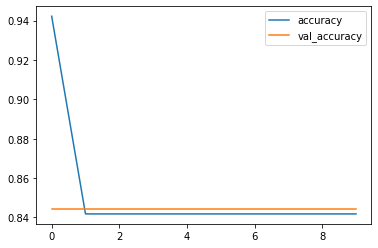

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.epoch, history.history.get('accuracy'),label='accuracy')
plt.plot(history.epoch, history.history.get('val_accuracy'),label='val_accuracy')
plt.legend()

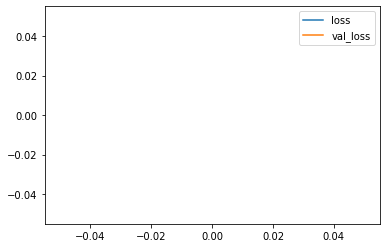

In [27]:
plt.plot(history.epoch, history.history.get('loss'),label='loss')
plt.plot(history.epoch, history.history.get('val_loss'),label='val_loss')
plt.legend()

In [28]:
from sklearn.metrics import classification_report

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
predict = model.predict(x_test)
y_pred=np.argmax(predict,axis=1)
print(classification_report(Y_test, y_pred))

565/565 [==============================] - 54s 96ms/step
              precision    recall  f1-score   support

           0       0.84      1.00      0.92     15254
           1       0.00      0.00      0.00      2809

    accuracy                           0.84     18063
   macro avg       0.42      0.50      0.46     18063
weighted avg       0.71      0.84      0.77     18063



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
%load_ext tensorboard
%matplotlib inline

In [21]:
y_true = y_test
y_pred = model.predict(x_test)
y_true = y_true.astype('int')
y_pred = y_pred.astype('int')
pred = []
for i in range(0,y_pred.shape[0]):
    a = y_pred[i][0]
    pred.append(a)
true = []
for i in range(0,y_true.shape[0]):
    a = y_true[i][0]
    true.append(a)
    
y_pred = []
for i in pred:
    if i == 1:
        y_pred.append(1)
    else:
        y_pred.append(0)

565/565 [==============================] - 50s 88ms/step


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
P = precision_score(true,y_pred,average='binary')
R = recall_score(true,y_pred,average='binary')
F1 = f1_score(true,y_pred,average='binary')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print('precision : ',P,'\n','recall :  ',R,'\n','F1  : ',F1)

precision :  0.0 
 recall :   0.0 
 F1  :  0.0
